In [23]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [24]:
data_folder = "../data/columncompression20210227"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
# high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name
5,./tpch_bitpacking_compactvector_f_singlethread...,4.007143e+10,1.420814,bitpacking_compactvector_16
3,./tpch_bitpacking_compactvector_singlethreaded...,4.121527e+10,1.336982,bitpacking_compactvector
6,./tpch_bitpacking_simdcai_seq_singlethreaded.json,4.821127e+10,1.074156,for_SIMDCAI_simd_seq
0,./tpch_bitpacking_simdcai_singlethreaded.json,4.799611e+10,1.032475,for_SIMDCAI_simd
7,./tpch_bitpacking_turbopfor_seq_singlethreaded...,4.355870e+10,1.215173,bitpacking_turboPFOR_seq
8,./tpch_bitpacking_turbopfor_singlethreaded.json,3.988083e+10,1.452004,bitpacking_turboPFOR
1,./tpch_compressionUnencoded_singlethreaded.json,4.056447e+10,1.482762,unencoded_Hyrise
4,./tpch_dictionary_singlethreaded.json,3.819539e+10,1.573198,bytepacking_Hyrise_fsba
2,./tpch_simdbp_singlethreaded.json,6.599329e+10,0.858254,simdbp128_Hyrise


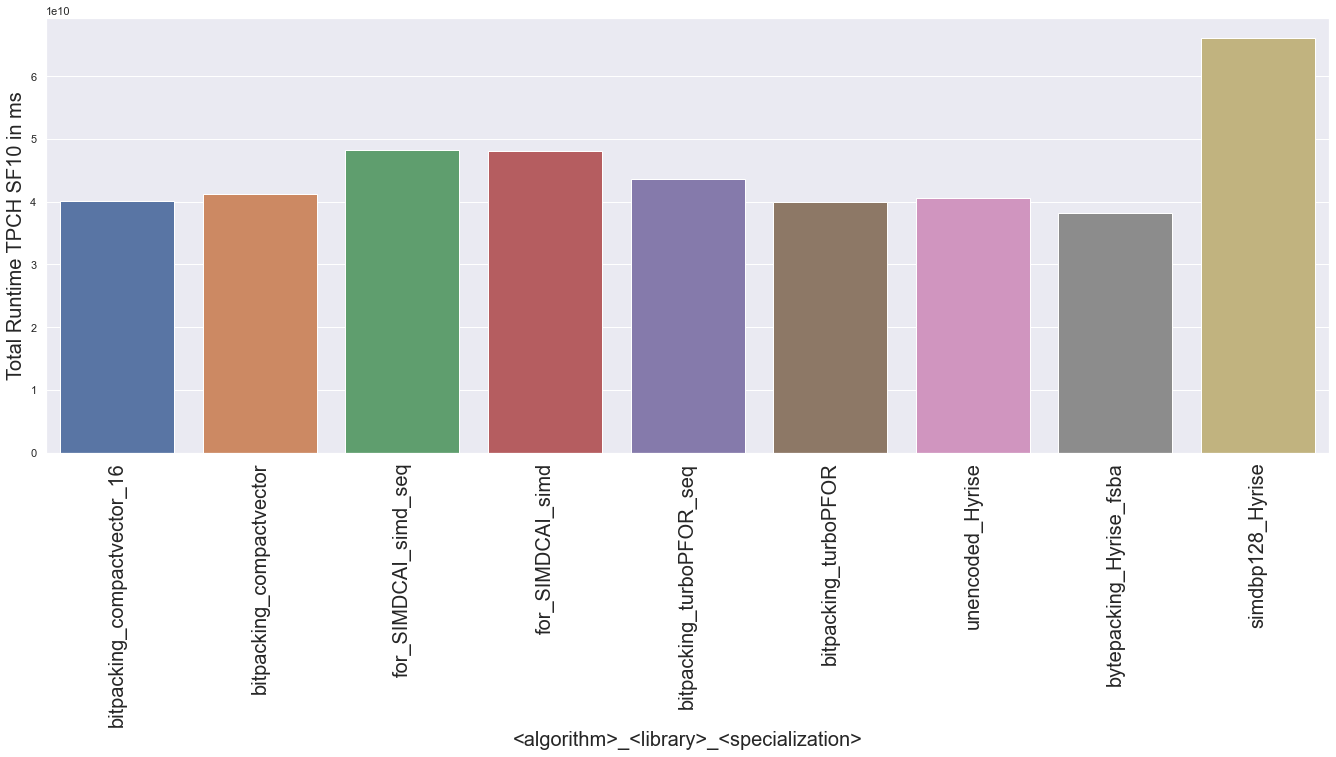

In [25]:
   
# https://stackoverflow.com/questions/28904397/how-to-set-the-value-of-the-axis-multiplier-in-matplotlib
class MagnitudeFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

sns.set(rc={'figure.figsize':(23,8)})

high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
plot = sns.barplot(data=high_level, x="fancy_name", y="total_runtime")
plot.set_xlabel("<algorithm>_<library>_<specialization>",fontsize=20)
plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90, fontsize=20)

#for ax in plot.axes.flat:
# ax.yaxis.set_major_formatter(MagnitudeFormatter(6))
plt.savefig(f"visualizations/tpch_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

In [26]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")
low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp|dict).*")]
low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [b.replace("TPC-H ", "") for b in low_level["query_name"]]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.790593e+09,0.147262,for_SIMDCAI_simd
176,./tpch_bitpacking_turbopfor_singlethreaded.json,01,5.544535e+09,0.180358,bitpacking_turboPFOR
154,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,7.233950e+09,0.138237,bitpacking_turboPFOR_seq
22,./tpch_compressionUnencoded_singlethreaded.json,01,5.493310e+09,0.182039,unencoded_Hyrise
66,./tpch_bitpacking_compactvector_singlethreaded...,01,6.215591e+09,0.160886,bitpacking_compactvector
...,...,...,...,...,...
87,./tpch_bitpacking_compactvector_singlethreaded...,22,4.814732e+08,2.076939,bitpacking_compactvector
153,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,5.654126e+08,1.768605,for_SIMDCAI_simd_seq
21,./tpch_bitpacking_simdcai_singlethreaded.json,22,6.075378e+08,1.645976,for_SIMDCAI_simd
43,./tpch_compressionUnencoded_singlethreaded.json,22,4.359958e+08,2.293575,unencoded_Hyrise


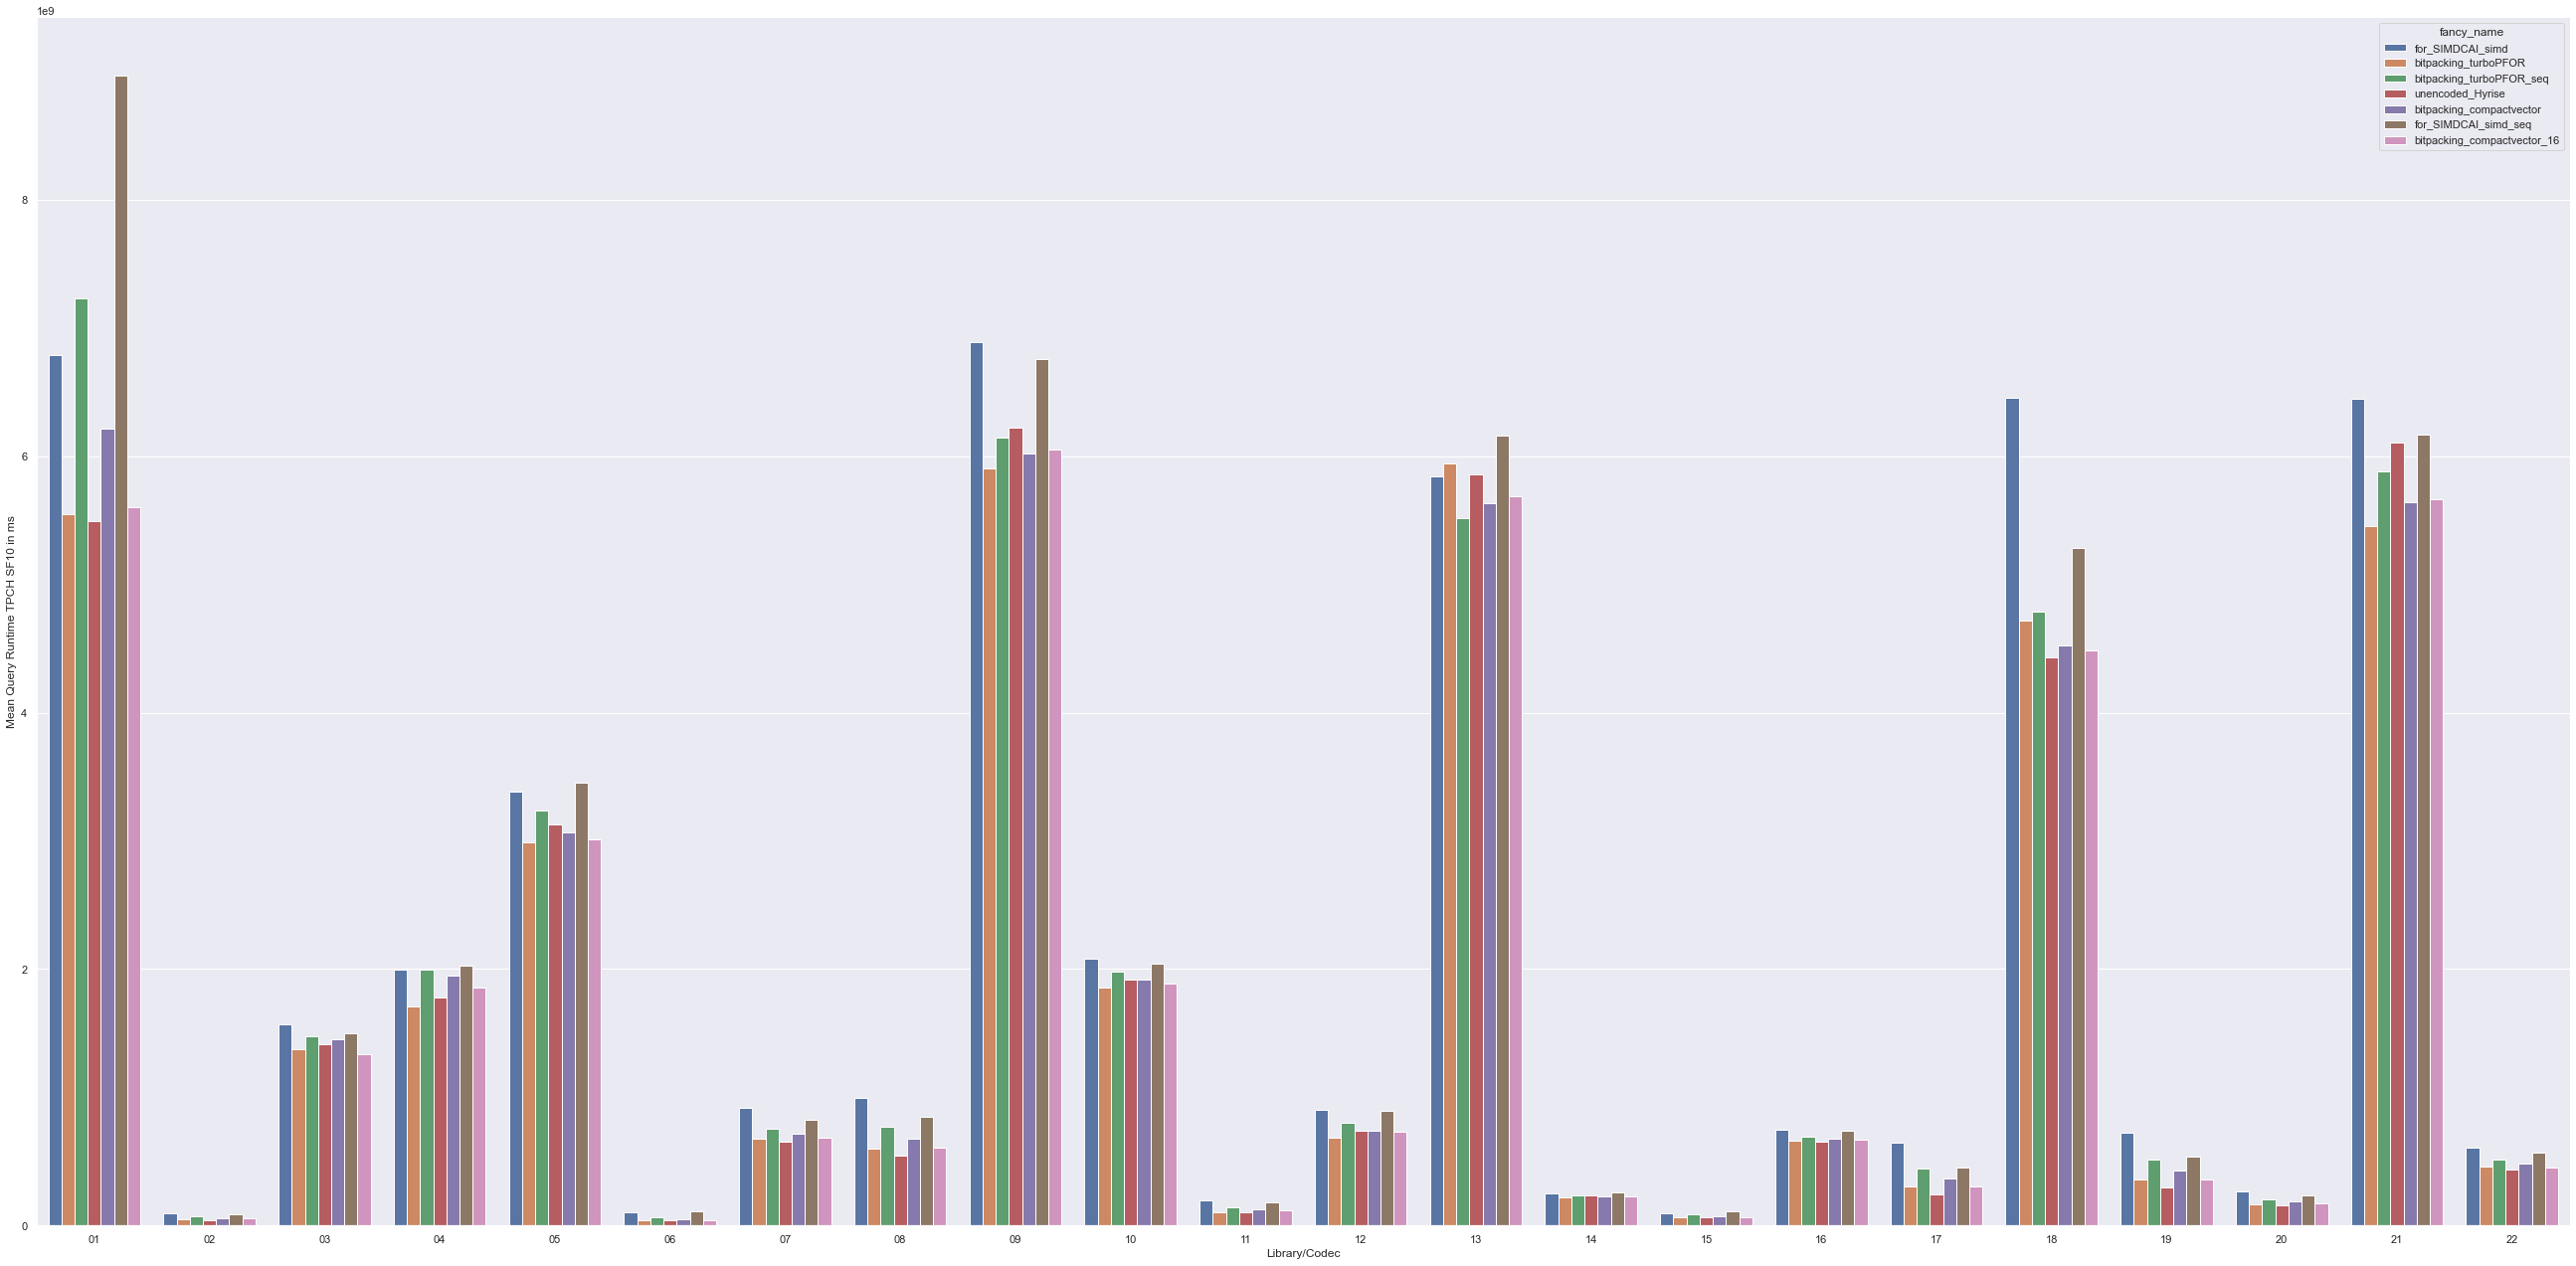

In [27]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="fancy_name", legend_out=False)
plot.set_axis_labels("Library/Codec", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(40,20)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_low_level_absolute.svg", format="svg")

In [28]:
low_level_nolto = low_level[~low_level["benchmark_run_name"].str.match(".*(LTO).*")]
default_query_durations = low_level_nolto[low_level_nolto["benchmark_run_name"].str.match(".*Unencoded.*")]

low_level_nolto = low_level_nolto.merge(default_query_durations, how="left", left_on="query_name", right_on="query_name")
low_level_nolto["duration_percentage"] = low_level_nolto["avg_duration_x"] / low_level_nolto["avg_duration_y"]
low_level_nolto_nodefault = low_level_nolto[~low_level_nolto["benchmark_run_name_x"].str.match(".*unencoded.*")]

low_level_nolto_nodefault

,benchmark_run_name_x,query_name,avg_duration_x,throughput_x,fancy_name_x,benchmark_run_name_y,avg_duration_y,throughput_y,fancy_name_y,duration_percentage
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.790593e+09,0.147262,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.236157
1,./tpch_bitpacking_turbopfor_singlethreaded.json,01,5.544535e+09,0.180358,bitpacking_turboPFOR,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.009325
2,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,7.233950e+09,0.138237,bitpacking_turboPFOR_seq,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.316865
3,./tpch_compressionUnencoded_singlethreaded.json,01,5.493310e+09,0.182039,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.000000
4,./tpch_bitpacking_compactvector_singlethreaded...,01,6.215591e+09,0.160886,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,5.493310e+09,0.182039,unencoded_Hyrise,1.131484
...,...,...,...,...,...,...,...,...,...,...
149,./tpch_bitpacking_compactvector_singlethreaded...,22,4.814732e+08,2.076939,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.104307
150,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,5.654126e+08,1.768605,for_SIMDCAI_simd_seq,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.296830
151,./tpch_bitpacking_simdcai_singlethreaded.json,22,6.075378e+08,1.645976,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.393449
152,./tpch_compressionUnencoded_singlethreaded.json,22,4.359958e+08,2.293575,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,4.359958e+08,2.293575,unencoded_Hyrise,1.000000


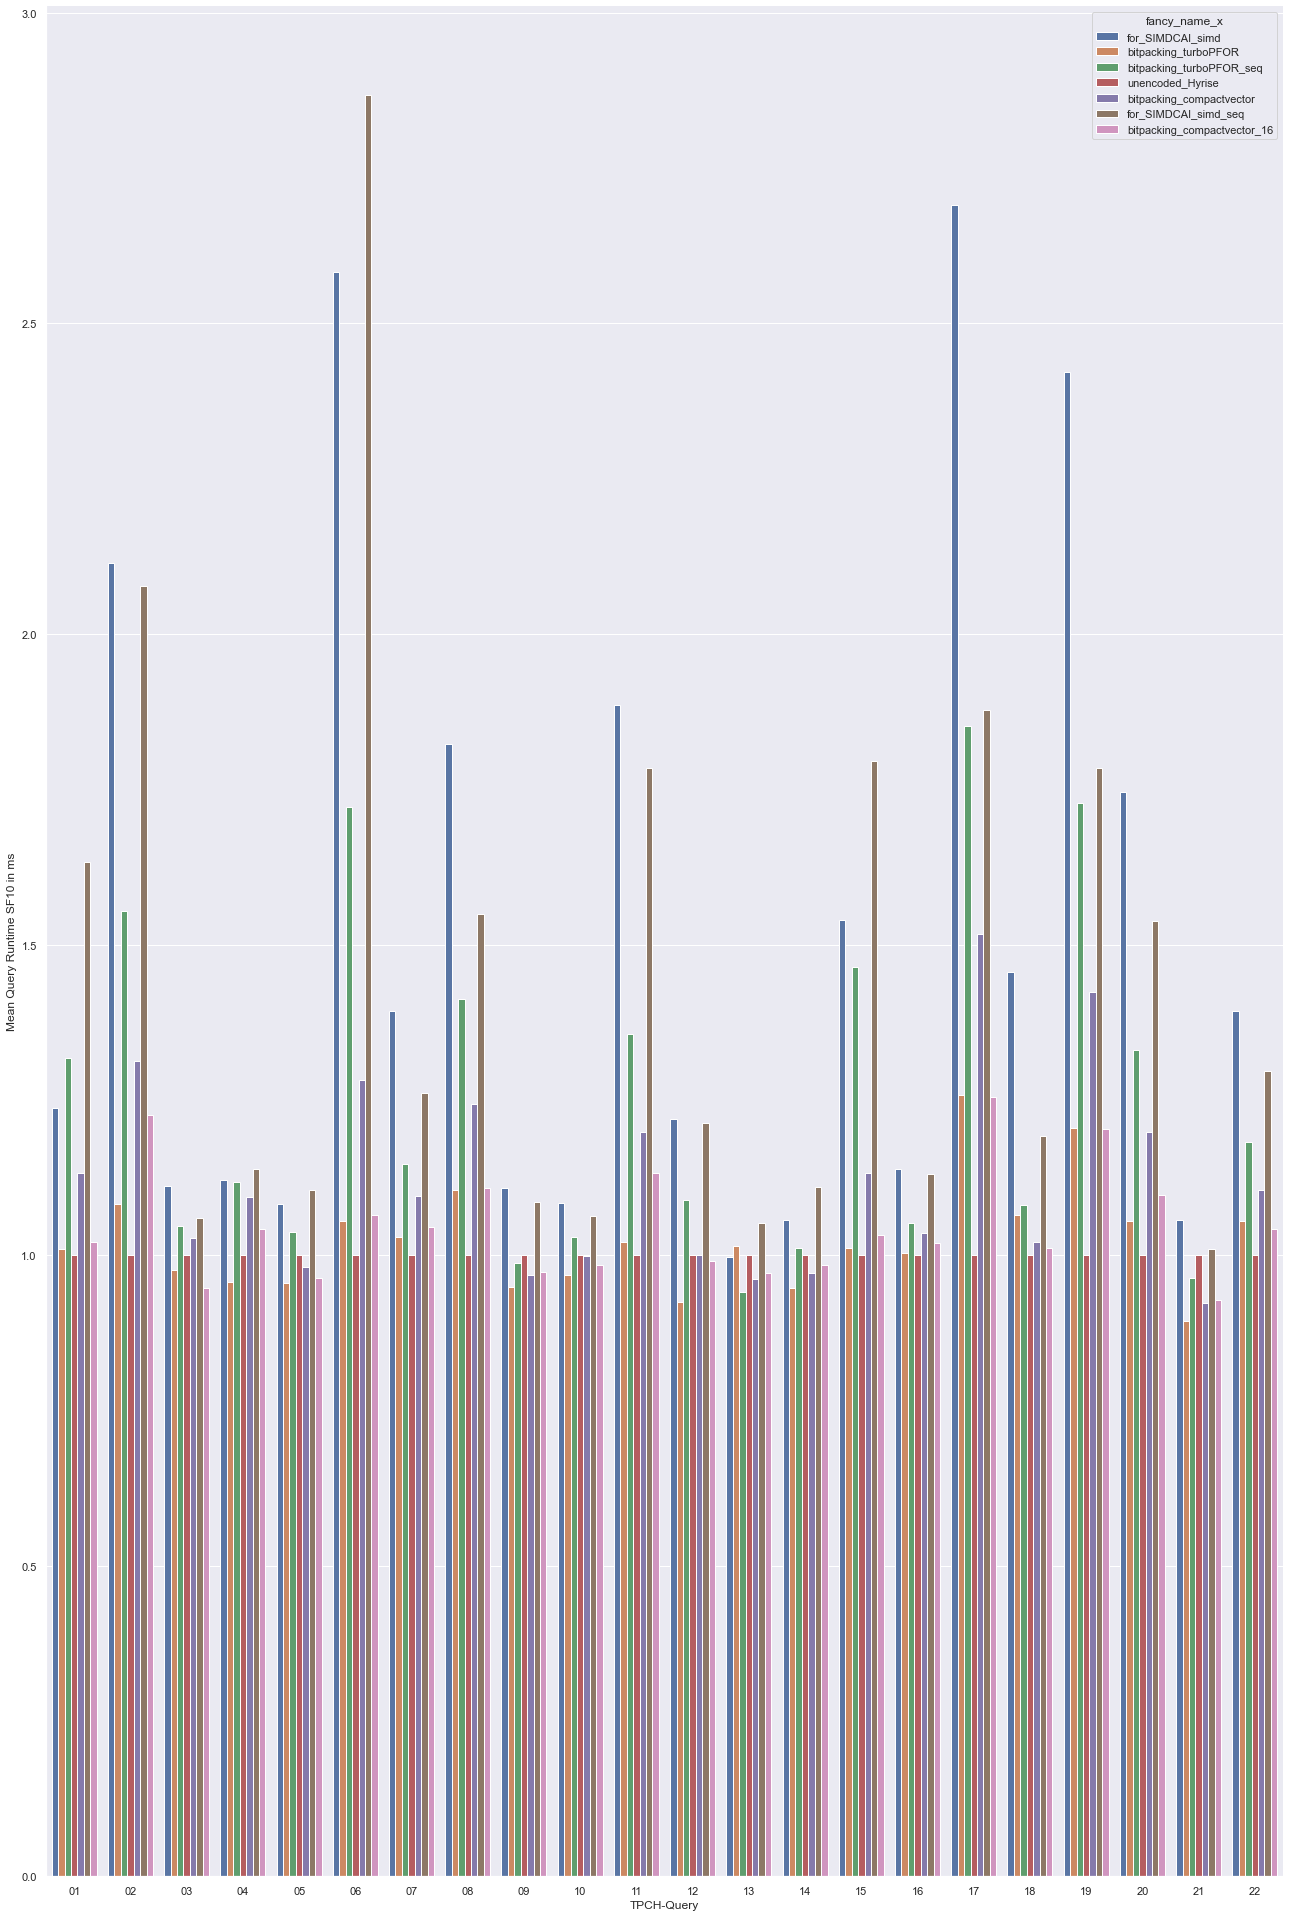

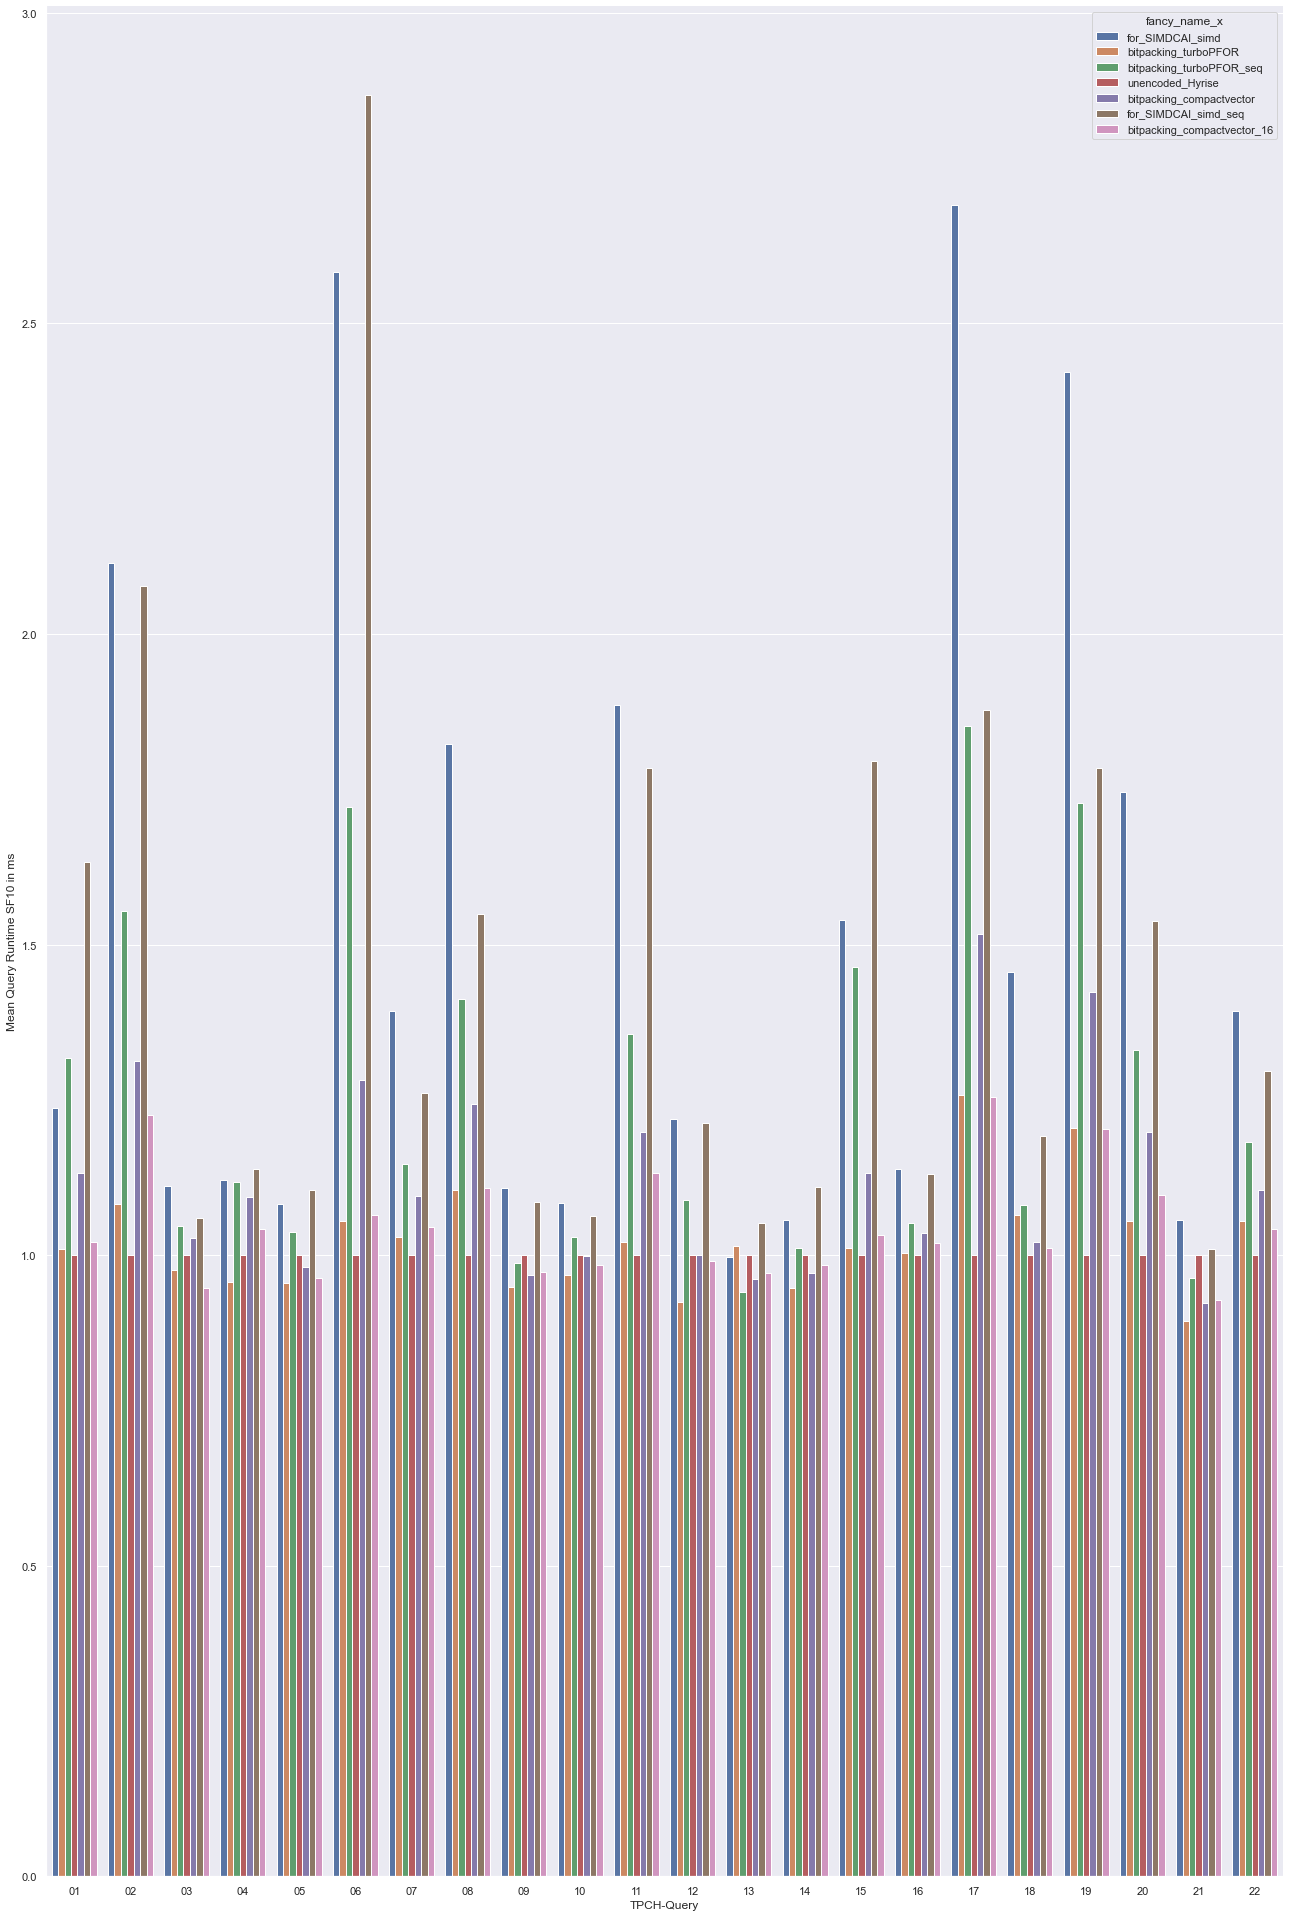

In [79]:

plot = sns.catplot(data=low_level_nolto, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x", legend_out=False)
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,30)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")


codecs_of_interest = low_level_nolto[low_level_nolto["fancy_name_x"].str.match(".*(bitpacking_turboPFOR|unencoded_Hyrise|bitpacking_compactvector|)")]
plot = sns.catplot(data=codecs_of_interest, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x", legend_out=False)
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,30)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")

In [30]:
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
5,./tpch_bitpacking_compactvector_f_singlethread...,4.007143e+10,1.420814,bitpacking_compactvector_16,False
3,./tpch_bitpacking_compactvector_singlethreaded...,4.121527e+10,1.336982,bitpacking_compactvector,False
6,./tpch_bitpacking_simdcai_seq_singlethreaded.json,4.821127e+10,1.074156,for_SIMDCAI_simd_seq,False
0,./tpch_bitpacking_simdcai_singlethreaded.json,4.799611e+10,1.032475,for_SIMDCAI_simd,False
7,./tpch_bitpacking_turbopfor_seq_singlethreaded...,4.355870e+10,1.215173,bitpacking_turboPFOR_seq,False
8,./tpch_bitpacking_turbopfor_singlethreaded.json,3.988083e+10,1.452004,bitpacking_turboPFOR,False
1,./tpch_compressionUnencoded_singlethreaded.json,4.056447e+10,1.482762,unencoded_Hyrise,False
4,./tpch_dictionary_singlethreaded.json,3.819539e+10,1.573198,bytepacking_Hyrise_fsba,False
2,./tpch_simdbp_singlethreaded.json,6.599329e+10,0.858254,simdbp128_Hyrise,False


In [31]:
data_path = Path("../data/columncompression20210227/sizes")

def load_table(path: Path) -> DataFrame:
    all_entries: List[List[str]] = []
    av_dict_entries: List[List[int]] = []
    column_names: List[str] = []
    types: List[str] = []
    with path.open() as file:
        table_starts: bool = False
        for line in file:
            if not table_starts and "attribute_vector_size" in line:
                e = [entry for entry in line.split(",") if entry != "" and entry != "\n"]
                av_dict_entries.append([int(e[1]), int(e[3])])
            if len(column_names) != 0 and table_starts and not '|' in line:
                break
            if not '|' in line:
                continue
            if len(column_names) == 0:
                column_names = [entry.replace(" ", "")
                                for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if len(types) == 0:
                types =  [entry.replace(" ", "")
                          for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if "<ValueS>" in line:
                table_starts = True
                continue
            if not table_starts:
                continue
            new_entry: List[str] = [entry.replace(" ", "")
                                    for entry in line.split("|") if entry != "" and entry != "\n"]
            all_entries.append(new_entry)
    as_type: Dict[str, str] = {column_names[i]:types[i] for i in range(0, len(column_names))}

    entries = [a + b for a,b, in zip(all_entries, av_dict_entries)]
    column_names = column_names + ["attribute_vector_size", "dict_size"]
    df = DataFrame(data=entries, columns=column_names).astype(as_type)

    df["duplication_factor"] = df["attribute_vector_size"] / df["dict_size"]

    df = df.astype({'duplication_factor': 'int32'})

    return df

default_filename = "sizes_compressionUnencoded.txt"
default = load_table(data_path / default_filename)

grouped_by_column = default.groupby(["table_name", "column_name", "column_data_type"], as_index=False)["size_in_bytes"].sum()
columns_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["column_name"].count()
size_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["size_in_bytes"].sum()
print("number of columns per datatype")
print(columns_per_data_type)

def compute_sizes(df):
    total_size = df["size_in_bytes"].sum()

    int_col_size = df[df["column_data_type"].str.match("int")]["size_in_bytes"].sum()
    float_col_size = df[df["column_data_type"].str.match("float")]["size_in_bytes"].sum()
    string_col_size = df[df["column_data_type"].str.match("string")]["size_in_bytes"].sum()

    return (total_size, int_col_size, float_col_size, string_col_size)

(default_size, default_int_col_size, default_float_col_size, default_string_col_size) = compute_sizes(default)
print("default dict size ", default_size)
print("default dict int col size ", default_int_col_size)
print("default int col portion of size ", default_int_col_size / default_size)

def fancy_codec_name(f):
    return f.replace("sizes_", "").replace(".txt", "")

names = []
total_sizes = []
int_col_sizes = []
float_col_sizes = []
string_col_sizes = []
directory = os.fsencode(data_path)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"):
        df = load_table(data_path / filename)
        names.append(filename)
        (total_size, int_col_size, float_col_size, string_col_size) = compute_sizes(df)
        total_sizes.append(total_size)
        int_col_sizes.append(int_col_size)
        float_col_sizes.append(float_col_size)
        string_col_sizes.append(string_col_size)

df = pd.DataFrame(data={'filename': names, 'total_size': total_sizes, 'int_col_sizes': int_col_sizes, 'float_col_sizes': float_col_sizes, 'string_col_sizes': string_col_sizes})

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("sizes_","").replace(".txt", "")
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

df["codec"] = [fancy_name(f) for f in df["filename"]]
df = df.sort_values("codec")
df

number of columns per datatype
  column_data_type  column_name
0            float            9
1              int           19
2           string           33
default dict size  13063740127
default dict int col size  2083656732
default int col portion of size  0.15949924843449084


,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec
0,sizes_bitpacking_compactvector.txt,9868210083,1445245248,664533612,7758431223,bitpacking_compactvector
6,sizes_bitpacking_compactvector_f.txt,11316269827,1609638576,989767660,8716863591,bitpacking_compactvector_16
1,sizes_bitpacking_turbopfor.txt,9582567033,1317708016,600855186,7664003831,bitpacking_turboPFOR
4,sizes_bitpacking_turbopfor_seq.txt,9582567033,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq
5,sizes_dictionary.txt,9999839546,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba
7,sizes_bitpacking_simdcai.txt,9567344611,1315743428,600776428,7650824755,for_SIMDCAI_simd
3,sizes_bitpacking_simdcai_seq.txt,9567344611,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq
8,sizes_simdbp.txt,9552397107,1307080816,602595564,7642720727,simdbp128_Hyrise
2,sizes_compressionUnencoded.txt,13063740127,2083656732,1389433132,9590650263,unencoded_Hyrise


In [32]:
d = df.merge(high_level, left_on="codec", right_on="fancy_name")
d

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO
0,sizes_bitpacking_compactvector.txt,9868210083,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,4.121527e+10,1.336982,bitpacking_compactvector,False
1,sizes_bitpacking_compactvector_f.txt,11316269827,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,4.007143e+10,1.420814,bitpacking_compactvector_16,False
2,sizes_bitpacking_turbopfor.txt,9582567033,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,3.988083e+10,1.452004,bitpacking_turboPFOR,False
3,sizes_bitpacking_turbopfor_seq.txt,9582567033,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,4.355870e+10,1.215173,bitpacking_turboPFOR_seq,False
4,sizes_dictionary.txt,9999839546,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,3.819539e+10,1.573198,bytepacking_Hyrise_fsba,False
5,sizes_bitpacking_simdcai.txt,9567344611,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,4.799611e+10,1.032475,for_SIMDCAI_simd,False
6,sizes_bitpacking_simdcai_seq.txt,9567344611,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,4.821127e+10,1.074156,for_SIMDCAI_simd_seq,False
7,sizes_simdbp.txt,9552397107,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,6.599329e+10,0.858254,simdbp128_Hyrise,False
8,sizes_compressionUnencoded.txt,13063740127,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,4.056447e+10,1.482762,unencoded_Hyrise,False


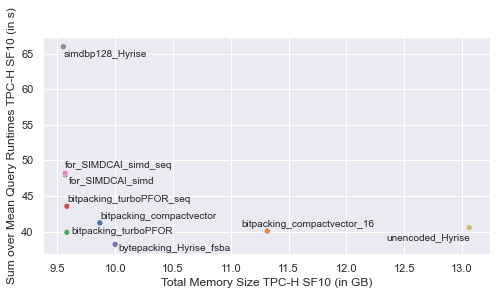

In [77]:
sns.set(rc={'figure.figsize':(8,4)})
d = df.merge(high_level, left_on="codec", right_on="fancy_name")
d["total_size"] = d["total_size"] / 10**9
d["total_runtime"] = d["total_runtime"] / 10**9
plot = sns.scatterplot(data=d, x="total_size", y="total_runtime", hue="codec")
plot.set_ylabel("Sum over Mean Query Runtimes TPC-H SF10 (in s)")
plot.set_xlabel("Total Memory Size TPC-H SF10 (in GB)")


offsets = {
    "bitpacking_compactvector" : (0,1),
    "bitpacking_compactvector_16" : (-2,1),
    "bitpacking_turboPFOR" : (0.4,-0.4),
    "bitpacking_turboPFOR_seq" : (0,1),
    "bytepacking_Hyrise_fsba" : (0.3,-1.5),
    "for_SIMDCAI_simd" : (0.3,-1.6),
    "for_SIMDCAI_simd_seq" : (0,1),
    "simdbp128_Hyrise" : (0,-1.5),
    "unencoded_Hyrise" : (-5.5,-3),
}

for i, (codec, size, runtime) in enumerate(zip(d["codec"], d["total_size"], d["total_runtime"])):
    plot.annotate(codec, (size + offsets[codec][0] * 0.01 * size, runtime + offsets[codec][1] * 0.015 * runtime), fontsize=10)

plot.legend_.remove()

plt.savefig(f"visualizations/pareto_1.svg", format="svg")

In [39]:
d["codec"]

0       bitpacking_compactvector
1    bitpacking_compactvector_16
2           bitpacking_turboPFOR
3       bitpacking_turboPFOR_seq
4        bytepacking_Hyrise_fsba
5               for_SIMDCAI_simd
6           for_SIMDCAI_simd_seq
7               simdbp128_Hyrise
8               unencoded_Hyrise
Name: codec, dtype: object

In [82]:
low_level["fancy_name"].unique()

array(['for_SIMDCAI_simd', 'bitpacking_turboPFOR',
       'bitpacking_turboPFOR_seq', 'unencoded_Hyrise',
       'bitpacking_compactvector', 'for_SIMDCAI_simd_seq',
       'bitpacking_compactvector_16'], dtype=object)